# Titanic - Machine Learning from Disaster



Com o objetivo de aprimorar-me nos estudos de ML e DataScience. Este desafio é fornecido na plataforma Kaggle e o seu objetivo é conseguir identificar qual os passageiros que irão sobreviver, usando conceitos de aprendizagem de máquina. Para isto, são fornecidos dois datasets, um com o nome de __train.csv__, que consiste em dados para o treino do algoritmo para aprender como o dado se comportam. O dataset tem a seguinte estrutura:

Variable    |	Definition  |   Key
----------- |   ----------  |   ---
survival 	|   Survival 	|   0 = No, 1 = Yes
pclass 	    |   Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd
sex      	|   Sex         |    	
Age 	    |   Age in years 	
sibsp 	    |   # of siblings / spouses aboard the Titanic 	
parch 	    |   # of parents / children aboard the Titanic 	
ticket 	    |   Ticket number 	    |
fare 	    |   Passenger fare (tarifa)	    |
cabin 	    |   Cabin number 	    |
embarked 	|   Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton

E também foi fornecido o dataset __test.csv__, que são os dados para o teste do algoritmo. Sua estrutura é a mesma que o do dataset anterior, porém sem a informação __survival__. Também foi fornecido o dataset __gender_submission.csv__, onde estão os dados verdadeiros para comparar os resultados do algorimo.

## Sumário

1. 

Importando as bibliotecas

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

Vamos ler e tratar cada dataset por vez, iniciando pelo de treinamento.

In [62]:
data_train = pd.read_csv("./datasets/train.csv")
data_test = pd.read_csv('./datasets/test.csv')
data_pred = pd.read_csv('./datasets/gender_submission.csv')

## tratando os dados

Juntando os dados para facilitar o tratamento e a manipulação dos dados

In [63]:
data_test = pd.merge(data_test, data_pred, how='inner', on=['PassengerId'])
data = pd.concat([data_train, data_test], ignore_index=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


visualizando os dados e realizando o tratamento necessário para a predição e visualização


In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
print(f"O dataset possui {data.shape[0]} amostras e {data.shape[1]} features")

O dataset possui 1309 amostras e 12 features


In [66]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Para análise e aprendizado do algoritmo podemos retirar a coluna `PassengerId`, `name` e `ticket` que simplesmente dizem sobre o id e nome do passageiro e o código da passagem que ele havia comprado, tais informações são irrelevantes para a criação do modelo.

In [67]:
drop_columns = ['PassengerId', 'Name', 'Ticket']
data.drop(columns=drop_columns, inplace=True)

In [68]:
target_name = 'Survived'
target = data_train[target_name]

/tmp/ipykernel_121014/2044781157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr() # método padrão -> pearson


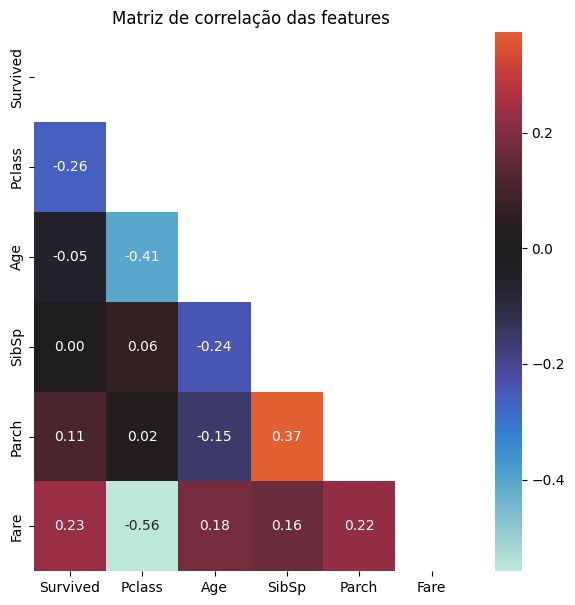

In [69]:
plt.figure(figsize=(7, 7))

correlation = data.corr() # método padrão -> pearson
mask = np.triu(np.ones_like(correlation, dtype=bool)) # pegar só a parte debaixo da matriz

_ = sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Matriz de correlação das features")

In [70]:
# _ = sns.pairplot(
#     data=data,
#     hue=target_name,
# )

Através dos gráficos com as features numéricas, podemos observar que elas são importantes, pois possuem padrões em suas relações. Por exemplo, `Pclass` com `Fare`, podemos observar e retirar do gráfico resultante das duas, que quanto mais tarifa foi paga e quanto mais alta a classe da cabine, mais pessoas sobreviveram.

Verificando e tratando dados faltantes

In [71]:
data.isnull().sum().sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
dtype: int64

A coluna Cabin é importante para a gente?

In [72]:
print(f"Na coluna Cabin existem {data['Cabin'].isnull().sum()} valores faltantes")

Na coluna Cabin existem 1014 valores faltantes


In [73]:
values_null = data['Cabin'].isnull().sum().item()

print(f"A porcentagem de dados faltantes em relação ao dataset é {values_null / data['Cabin'].shape[0] * 100:.2f}%")

A porcentagem de dados faltantes em relação ao dataset é 77.46%


Podemos observar que a porcentagem dos dados faltantes é alta, desta forma seria difícil de incluirmos esta coluna em nossa análise, pois teríamos que realizar uma grande `suposição` para tratarmos esses dados. Desta forma, é mais viável retirarmos ele para uma melhor qualidade do modelo.

In [74]:
data.drop(columns=['Cabin'], inplace=True)

Agora verificando a coluna embarked

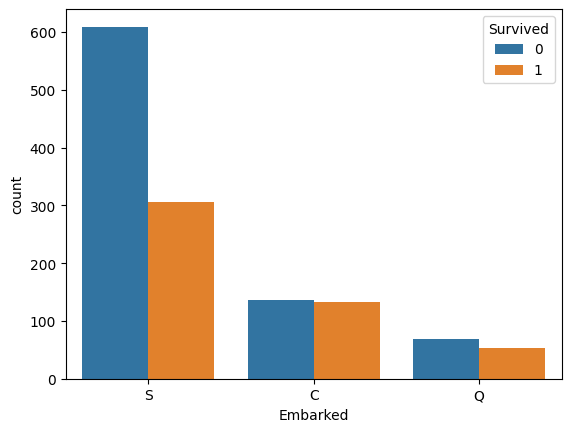

In [75]:
_ = sns.countplot(data=data, x='Embarked', hue=target_name)

In [76]:
# subistiui os valores nulos pelo valor que mais se repete, no caso S

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].dropna().max())
# fillna pega os valores nulos e faz uma alteração, no caso, substitui pelo valor que mais se repete

In [77]:
data.isnull().sum().sort_values(ascending=False)

Age         263
Fare          1
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
dtype: int64

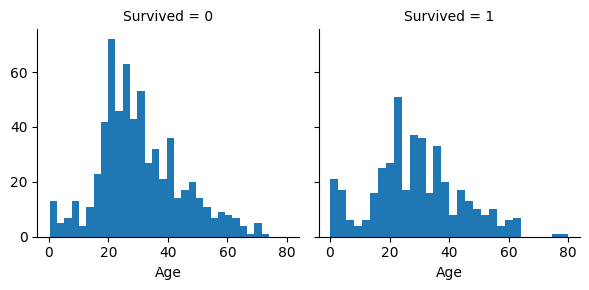

In [78]:
fig = sns.FacetGrid(data, col='Survived')
fig.map(plt.hist, 'Age', bins=30)

In [79]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [80]:
data.isnull().sum().sort_values(ascending=False)

Fare        1
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Para corrigir o valor de `Fare` vamos buscar de qual classe ele pertence e ai atribuir o valor médio das passagens pertencentes àquela classe.

In [81]:
# encontrar o valor nulo
bool_series = pd.isnull(data['Fare'])

data[bool_series]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1043,0,3,male,60.5,0,0,NaN,S


Notamos que ele se encontra na classe 3, então faremos uma média dos valores desta classe e iremos atribuir a ele

In [82]:
pclass3 = data['Pclass'] == 3 # separo todos os valores de Pclass = 3
data['Fare'] = data['Fare'].fillna(data[pclass3].Fare.mean())

In [83]:
data.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Tratar valores que são categóricos, que são as colunas `Sex` e `Embarked`

In [84]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

In [85]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

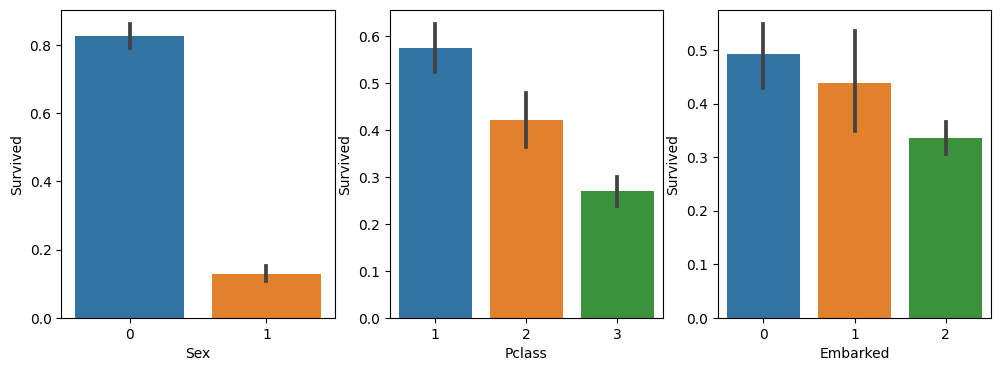

In [86]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(data=data, x='Sex', y='Survived', ax=axis1)
sns.barplot(data=data, x='Pclass', y='Survived', ax=axis2)
sns.barplot(data=data, x='Embarked', y='Survived', ax=axis3)

Partindo para a criação do modelo

In [87]:
target = data['Survived']
data = data.drop(columns=['Survived'])

In [88]:
data_train, data_test, target_train, target_test = train_test_split(data, target)

In [89]:
data_train = StandardScaler().fit_transform(data_train)
data_test = StandardScaler().fit_transform(data_test)

In [90]:
model = LogisticRegression()

_ = model.fit(data_train, target_train)

In [91]:
accuracy = model.score(data_test, target_test)

accuracy

0.8323170731707317